In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split

# Display preferences
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
# Load the houseprices data from Thinkful's database.
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprices_df = pd.read_sql_query('select * from houseprices',con=engine)
houseprices_df.head(2)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500


In [5]:
houseprices_df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paved

In [14]:
houseprices_df_new=houseprices_df.dropna(axis=1,how='any')

In [19]:
houseprices_df_new.drop('id',axis=1,inplace=True)

In [43]:
houseprices_df_new.select_dtypes('object').columns

Index(['mszoning', 'street', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'exterqual', 'extercond', 'foundation', 'heating',
       'heatingqc', 'centralair', 'kitchenqual', 'functional', 'paveddrive',
       'saletype', 'salecondition'],
      dtype='object')

In [44]:
houseprices_df_new.select_dtypes(['int64','float64']).columns

Index(['mssubclass', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt',
       'yearremodadd', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf',
       'firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea',
       'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr',
       'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garagecars',
       'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch',
       'threessnporch', 'screenporch', 'poolarea', 'miscval', 'mosold',
       'yrsold', 'saleprice'],
      dtype='object')

In [63]:
cat_df=houseprices_df[['mszoning', 'street', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'exterqual', 'extercond', 'foundation', 'heating',
       'heatingqc', 'centralair', 'kitchenqual', 'functional', 'paveddrive',
       'saletype', 'salecondition']]
cat_df_enc=pd.get_dummies(cat_df,drop_first=True)

In [64]:
num_df=houseprices_df[['mssubclass', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt',
       'yearremodadd', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf',
       'firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea',
       'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr',
       'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garagecars',
       'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch',
       'threessnporch', 'screenporch', 'poolarea', 'miscval', 'mosold',
       'yrsold', 'saleprice']]

In [65]:
new_df=pd.concat([cat_df_enc,num_df],axis=1)

In [66]:
#Split data into train and test sets.
X=new_df.drop('saleprice',axis=1)
Y=new_df['saleprice']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
X_train.shape ,y_train.shape ,X_test.shape ,y_test.shape

((1168, 188), (1168,), (292, 188), (292,))

In [67]:
#Estimate model from the previous lesson in the training set. Assess the goodness of fit of your model.

In [72]:
X_train=sm.add_constant(X_train)
result=sm.OLS(y_train,X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     75.91
Date:                Tue, 31 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:48:46   Log-Likelihood:                -13251.
No. Observations:                1168   AIC:                         2.687e+04
Df Residuals:                     985   BIC:                         2.779e+04
Df Model:                         182                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.651e+05    9.7e+05     -0.582      0.560   -2.47e+06    1.34e+06
mszoning_FV             2.48e+04   1.27e+04      1.958      0.051     -57.339    4.97e+04
mszoning_RH            3.057e+04   1.27e+04      2.403      0.016    5604.808    5.55e+04
mszoning_RL            2.922e+04   1.08e+04      2.715      0.007    8100.314    5.03e+04
mszoning_RM            2.341e+04   1.01e+04      2.324      0.020    3639.618    4.32e+04
street_Pave            2.141e+04   1.28e+04      1.667      0.096   -3798.625    4.66e+04
lotshape_IR2          -1353.0059   4557.357     -0.297      0.767   -1.03e+04    7590.240
lotshape_IR3          -4034.0992   8374.718     -0.482      0.630   -2.05e+04    1.24e+04
lotshape_Reg           1014.0517   1751.675      0.579      0.563   -2423.392    4451.495
landcontour_HLS        1.141e+04   5585.164      2.043      0.041     449.389    2.24e+04
landcontour_Low       -7668.6395   7342.531     -1.044      0.297   -2.21e+04    6740.162
landcontour_Lvl        -183.2524   4011.366     -0.046      0.964   -8055.058    7688.554
utilities_NoSeWa      -4.313e-06    7.5e-06     -0.575      0.565    -1.9e-05    1.04e-05
lotconfig_CulDSac      7046.3416   3452.353      2.041      0.042     271.529    1.38e+04
lotconfig_FR2         -6369.0304   4539.821     -1.403      0.161   -1.53e+04    2539.801
lotconfig_FR3          1.059e+04    2.3e+04      0.460      0.646   -3.46e+04    5.58e+04
lotconfig_Inside      -1453.3083   1878.850     -0.774      0.439   -5140.316    2233.700
landslope_Mod          7695.3513   4213.983      1.826      0.068    -574.065     1.6e+04
landslope_Sev         -5.074e+04   1.24e+04     -4.080      0.000   -7.52e+04   -2.63e+04
neighborhood_Blueste   1.489e+04   1.88e+04      0.792      0.428    -2.2e+04    5.18e+04
neighborhood_BrDale    2.588e+04   1.23e+04      2.106      0.035    1769.458       5e+04
neighborhood_BrkSide   2.019e+04   1.03e+04      1.959      0.050     -39.936    4.04e+04
neighborhood_ClearCr  -1730.4310   1.03e+04     -0.168      0.867    -2.2e+04    1.85e+04
neighborhood_CollgCr   4138.0151   8172.560      0.506      0.613   -1.19e+04    2.02e+04
neighborhood_Crawfor   2.565e+04   9553.259      2.685      0.007    6901.728    4.44e+04
neighborhood_Edwards   1395.6024   8914.071      0.157      0.876   -1.61e+04    1.89e+04
neighborhood_Gilbert  -1414.9903   8617.859     -0.164      0.870   -1.83e+04    1.55e+04
neighborhood_IDOTRR    1.823e+04   1.19e+04      1.536      0.125   -5066.031    4.15e+04
neighborhood_MeadowV   1.974e+04   1.23e+04      1.604      0.109   -4418.030    4.39e+04
neighborhood_Mitchel  -3496.5135   9192.633     -0.380      0.704   -2.15e+04    1.45e+04
neighborhood_NAmes      497.4414   8730.853      0.057      0.955   -1.66e+04    1.76e+04
neighborhood_NPkVill   

In [ ]:
#Predict the house prices in the test set, 
#evaluate the performance of your model using the metrics previously mentioned in this lesson.

In [80]:
X_test=sm.add_constant(X_test)
y_predict=result.predict(X_test)
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse,rmse

print('MAE: {}'.format(mean_absolute_error(y_test,y_predict)))
print('MSE: {}'.format(mse(y_test,y_predict)))
print('RMSE: {}'.format(rmse(y_test,y_predict)))
print('MAPE: {}'.format(np.mean(np.abs((y_test-y_predict)/y_test))*100))

MAE: 22959.804512003033
MSE: 3957173854.8085804
RMSE: 62906.07168476331
MAPE: 13.738016644045615


In [ ]:
#Is the performance of your model satisfactory? Why or why not?

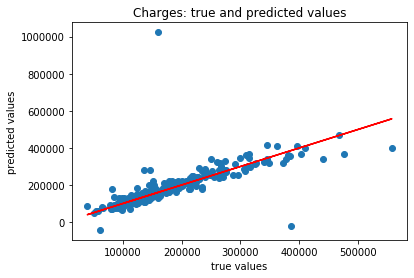

In [81]:
plt.scatter(y_test, y_predict)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

In [ ]:
We have some outlier. 

In [93]:
#Try to improve your model in terms of predictive performance by adding or removing some variables.
cat_df=houseprices_df[['mszoning', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'exterqual', 'extercond', 'foundation', 'heating',
       'heatingqc', 'kitchenqual', 'functional', 'paveddrive',
       'saletype', 'salecondition']]
cat_df_enc=pd.get_dummies(cat_df,drop_first=True)

num_df=houseprices_df[['mssubclass', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt',
       'yearremodadd', 'bsmtfinsf1',  'bsmtunfsf', 'totalbsmtsf',
       'firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea',
       'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr',
       'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garagecars',
       'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch',
       'threessnporch', 'screenporch', 'poolarea', 'miscval', 'mosold',
       'yrsold', 'saleprice']]

new_df=pd.concat([cat_df_enc,num_df],axis=1)

In [94]:
abs(new_df.corr()['saleprice']).sort_values().head()

roofmatl_Metal       0.000304
roofstyle_Mansard    0.000308
foundation_Wood      0.002711
condition2_RRAe      0.002993
bldgtype_TwnhsE      0.003804
Name: saleprice, dtype: float64

In [95]:
#Split data into train and test sets.
X=new_df.drop('saleprice',axis=1)
Y=new_df['saleprice']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
X_train.shape ,y_train.shape ,X_test.shape ,y_test.shape

((1168, 185), (1168,), (292, 185), (292,))

In [96]:
X_train=sm.add_constant(X_train)
result=sm.OLS(y_train,X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     63.35
Date:                Tue, 31 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:11:33   Log-Likelihood:                -13354.
No. Observations:                1168   AIC:                         2.707e+04
Df Residuals:                     987   BIC:                         2.799e+04
Df Model:                         180                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7.416e+05   1.05e+06     -0.706      0.480    -2.8e+06    1.32e+06
mszoning_FV            4.095e+04   1.44e+04      2.843      0.005    1.27e+04    6.92e+04
mszoning_RH            2.172e+04   1.45e+04      1.502      0.134   -6667.161    5.01e+04
mszoning_RL            2.884e+04   1.24e+04      2.335      0.020    4598.149    5.31e+04
mszoning_RM            2.951e+04   1.16e+04      2.536      0.011    6674.513    5.24e+04
lotshape_IR2           6290.8542   4941.732      1.273      0.203   -3406.654     1.6e+04
lotshape_IR3           6908.0148   9591.831      0.720      0.472   -1.19e+04    2.57e+04
lotshape_Reg            756.2480   1910.599      0.396      0.692   -2993.055    4505.551
landcontour_HLS        1.356e+04   6088.595      2.227      0.026    1611.303    2.55e+04
landcontour_Low        7806.9053   7903.721      0.988      0.324   -7703.123    2.33e+04
landcontour_Lvl        6868.6453   4484.888      1.532      0.126   -1932.367    1.57e+04
utilities_NoSeWa      -3.691e+04   2.76e+04     -1.337      0.182   -9.11e+04    1.73e+04
lotconfig_CulDSac      7107.8414   3726.832      1.907      0.057    -205.584    1.44e+04
lotconfig_FR2         -6664.2390   4888.678     -1.363      0.173   -1.63e+04    2929.159
lotconfig_FR3         -2.767e+04    1.6e+04     -1.734      0.083    -5.9e+04    3640.282
lotconfig_Inside      -1026.0406   2084.039     -0.492      0.623   -5115.697    3063.616
landslope_Mod          7017.5190   4816.301      1.457      0.145   -2433.848    1.65e+04
landslope_Sev         -2.781e+04   1.48e+04     -1.873      0.061   -5.69e+04    1323.347
neighborhood_Blueste   -565.6851   2.01e+04     -0.028      0.978   -4.01e+04    3.89e+04
neighborhood_BrDale    9022.0491   1.26e+04      0.718      0.473   -1.56e+04    3.37e+04
neighborhood_BrkSide  -1917.1221   1.08e+04     -0.178      0.859   -2.31e+04    1.92e+04
neighborhood_ClearCr  -1.798e+04    1.1e+04     -1.631      0.103   -3.96e+04    3651.408
neighborhood_CollgCr  -6787.3317   8231.264     -0.825      0.410   -2.29e+04    9365.457
neighborhood_Crawfor   7130.7440   9788.689      0.728      0.467   -1.21e+04    2.63e+04
neighborhood_Edwards  -1.839e+04   9078.773     -2.026      0.043   -3.62e+04    -577.188
neighborhood_Gilbert  -9945.9986   8877.944     -1.120      0.263   -2.74e+04    7475.817
neighborhood_IDOTRR     -1.3e+04   1.24e+04     -1.047      0.295   -3.74e+04    1.14e+04
neighborhood_MeadowV  -8959.4084   1.28e+04     -0.698      0.485   -3.41e+04    1.62e+04
neighborhood_Mitchel  -1.931e+04   9433.793     -2.047      0.041   -3.78e+04    -797.660
neighborhood_NAmes     -1.45e+04   8937.247     -1.623      0.105    -3.2e+04    3037.348
neighborhood_NPkVill   1.098e+04   1.67e+04      0.660      0.510   -2.17e+04    4.37e+04
neighborhood_NWAmes    

MAE: 21332.573973069448
MSE: 2729472084.7589602
RMSE: 52244.349787885774
MAPE: 13.046399425415897


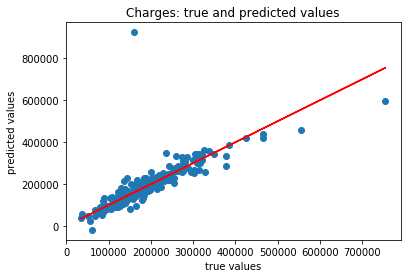

In [97]:
X_test=sm.add_constant(X_test)
y_predict=result.predict(X_test)
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse,rmse

print('MAE: {}'.format(mean_absolute_error(y_test,y_predict)))
print('MSE: {}'.format(mse(y_test,y_predict)))
print('RMSE: {}'.format(rmse(y_test,y_predict)))
print('MAPE: {}'.format(np.mean(np.abs((y_test-y_predict)/y_test))*100))
plt.scatter(y_test, y_predict)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()